# Used Car Price Prediction

## TODO Use MLFLow to caputre and track the hypertunning & diffirent run results

## Methodology 


1. Linear Regression: Quick to train and test as a baseline algorithm

2. Gradient Boost: To account for non-linear relationships By splitting the data into 100 regions

3. Random Forest : To account for the large number of features in the
    Dataset and compare a bagging technique with the Gradient Boost method.

4. XGBoost: To improve performance compared to standard Gradient
    Boosting using regularization, second order gradients and added
    support for parallel compute.

5. KMeans + Linear Regression Ensemble: 
    In order to capitalize on the linear regression results using ensemble learning,

6. Light GBM: To improve performance compared to Gradient
    Boosting with a leaf-wise-tree growth approach and improved
    speed compared to XGBoos

## Metrics 

* Mean Squared Error(MSE)
* Root-Mean-Squared-Error(RMSE).
* Mean-Absolute-Error(MAE).
* R² or Coefficient of Determination.
* Adjusted R²


### I will be using RMSE & R2 for model comparisions. RMSE primarily because want to panalize if there is huge diffirence in predicted and actual price

## Data Prepocessing 

In [400]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import os
import seaborn as sns

In [235]:
df = pd.read_csv("DataScienceCodingChallengeJunior-ML.csv")

In [236]:
df.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8


## Check for Missing Values

In [21]:
missing_values = df.isnull().sum()
missing_values

Price           0
Make            0
Location        0
Age             0
Odometer        0
FuelType        0
Transmission    0
OwnerType       0
Mileage         0
EngineCC        0
PowerBhp        0
dtype: int64

### No missing value hence we are good! No need to fill up anything

In [237]:
df.describe()

,Price,Age,Odometer
count,6019.000000,6019.000000,6.019000e+03
mean,9.479468,6.641801,5.873838e+04
std,11.187917,3.269742,9.126884e+04
min,0.440000,1.000000,1.710000e+02
25%,3.500000,4.000000,3.400000e+04
50%,5.640000,6.000000,5.300000e+04
75%,9.950000,9.000000,7.300000e+04
max,160.000000,22.000000,6.500000e+06


In [238]:
df.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp'],
      dtype='object')

### Mileage, EngineCC & PowerBhp need to be checked

In [239]:
#df['Mileage']
np.issubdtype(df['Mileage'].dtype, np.number)

False

In [240]:
np.issubdtype(df['EngineCC'].dtype, np.number)

False

In [241]:
np.issubdtype(df['PowerBhp'].dtype, np.number)

False

In [242]:
df.shape

(6019, 11)

In [243]:
df[df.Mileage.apply(lambda x: x.isnumeric())].shape

(768, 11)

In [244]:
df[df.EngineCC.apply(lambda x: x.isnumeric())].shape

(5983, 11)

In [245]:
df[df.PowerBhp.apply(lambda x: x.isnumeric())].shape

(2188, 11)

### +AC0-1 character is present in above feature hence we need to take care of this. 

Two options
* Remove those data points/rows
* Replace this by mean of the feature

In [247]:
df.shape

(6019, 11)

In [250]:
df = df[(df != '+AC0-1').all(1)]

In [252]:
df.shape

(6000, 11)

#### We just lost 19 data points hence removing this data points will be a better approach

In [255]:
df[df.Mileage.apply(lambda x: x.isnumeric())]

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
35,1.85,marutiwagonr,Jaipur,11,83816,Petrol,Manual,Second,14,1061,64
61,2.75,fordfigo,Bangalore,10,72000,Diesel,Manual,First,20,1399,68
64,2.50,tataindica,Chennai,4,178000,Diesel,Manual,First,25,1396,69
82,4.82,hondaamaze,Kochi,4,54944,Petrol,Manual,First,18,1198,86.7
83,2.80,fordfigo,Hyderabad,8,70337,Diesel,Manual,First,20,1399,68
...,...,...,...,...,...,...,...,...,...,...,...
5964,12.85,hyundaiverna,Mumbai,2,8000,Petrol,Automatic,First,17,1591,121.3
5974,5.75,volkswagenameo,Ahmedabad,4,34005,Petrol,Manual,First,17,1198,73.75
5978,5.30,mahindraxylo,Hyderabad,4,105545,Diesel,Manual,First,14,2498,112
5994,3.25,hondacity,Pune,11,60000,Petrol,Manual,Third,17,1497,118


In [256]:
df.select_dtypes(include=[np.number])

,Price,Age,Odometer
0,1.75,10,72000
1,12.50,5,41000
2,4.50,9,46000
3,6.00,8,87000
4,17.74,7,40670
...,...,...,...
6014,4.75,6,27365
6015,4.00,5,100000
6016,2.90,8,55000
6017,2.65,7,46000


## Data Exploration 

In [257]:
df['OwnerType'].value_counts()

First                 4917
Second                 962
Third                  112
Fourth +ACY- Above       9
Name: OwnerType, dtype: int64

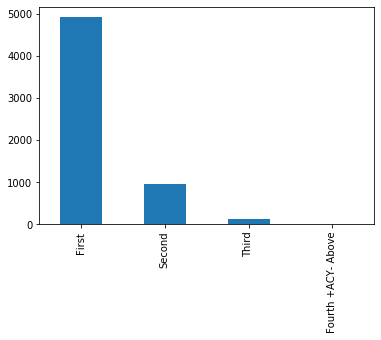

In [261]:
df['OwnerType'].value_counts().plot(kind='bar')

In [262]:
df['Make'].value_counts()

marutiswift             353
hondacity               270
hyundaii20              247
hyundaiverna            170
hyundaii10              156
                       ... 
bentleycontinental        1
minicountryman            1
jaguarf                   1
ambassadorclassic         1
mercedesbenzclsclass      1
Name: Make, Length: 206, dtype: int64

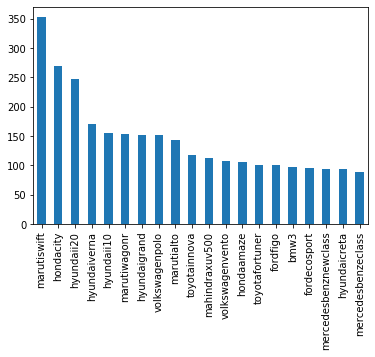

In [264]:
df['Make'].value_counts()[:20].plot(kind='bar')

### TODO : Make can be used to identify the brand 


Have collected list of car brand names

In [297]:
car_brands = pd.read_csv("car_brands.csv")

In [301]:
car_brands

,car_brands
0,Alfa Romeo
1,Aston Martin
2,Audi
3,Bentley
4,Benz
...,...
64,Suzuki
65,Toyota
66,Vauxhall
67,Volkswagen


In [319]:
len(df['Make'].unique())

206

In [328]:
df['Brand'] = df['Make'].str[:5]

In [329]:
df['Brand'].unique()

array(['marut', 'hyund', 'honda', 'audia', 'nissa', 'toyot', 'volks',
       'tatai', 'landr', 'mitsu', 'renau', 'merce', 'bmw3', 'mahin',
       'tatan', 'fordf', 'porsc', 'tataz', 'bmw5', 'forde', 'datsu',
       'jagua', 'volvo', 'bmw1', 'chevr', 'skoda', 'audir', 'bmwx5',
       'minic', 'audiq', 'bmwx1', 'fiatg', 'bmwx3', 'tatas', 'bmw6',
       'tatam', 'tatax', 'fiatl', 'audit', 'jeepc', 'fordi', 'tatah',
       'tatat', 'bmw7', 'fiata', 'ambas', 'forda', 'fiatp', 'bmwx6',
       'tatab', 'tatav', 'isuzu', 'fordc', 'fordm', 'bmwz4', 'force',
       'bentl', 'lambo'], dtype=object)

In [330]:
df['Brand'] = df['Make'].str[:3]

In [331]:
df['Brand'].unique()

array(['mar', 'hyu', 'hon', 'aud', 'nis', 'toy', 'vol', 'tat', 'lan',
       'mit', 'ren', 'mer', 'bmw', 'mah', 'for', 'por', 'dat', 'jag',
       'che', 'sko', 'min', 'fia', 'jee', 'amb', 'isu', 'ben', 'lam'],
      dtype=object)

In [265]:
df['Location'].value_counts()

Mumbai        787
Hyderabad     739
Kochi         650
Coimbatore    635
Pune          619
Delhi         554
Kolkata       533
Chennai       490
Jaipur        412
Bangalore     358
Ahmedabad     223
Name: Location, dtype: int64

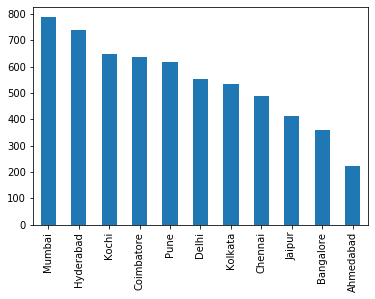

In [266]:
df['Location'].value_counts()[:20].plot(kind='bar')

In [267]:
df['FuelType'].value_counts()

Diesel    3198
Petrol    2736
CNG         56
LPG         10
Name: FuelType, dtype: int64

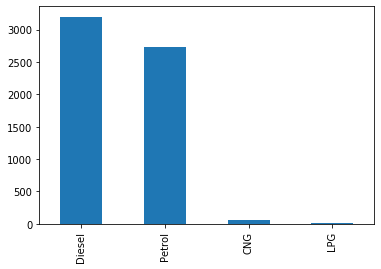

In [268]:
df['FuelType'].value_counts()[:20].plot(kind='bar')

In [269]:
df['Transmission'].value_counts()

Manual       4287
Automatic    1713
Name: Transmission, dtype: int64

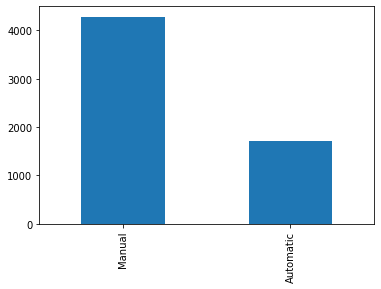

In [271]:
df['Transmission'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

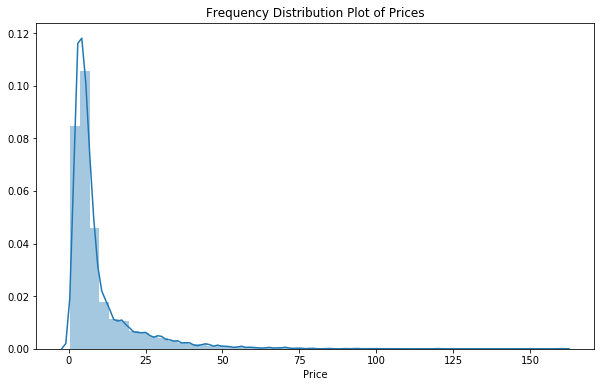

In [274]:
x = df.Price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

In [275]:
df.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp'],
      dtype='object')

In [332]:
cat_val = ['Brand','Make', 'Location', 'FuelType','Transmission', 'OwnerType']

for col in cat_val:
    print ([col]," : ",df[col].unique())

['Brand']  :  ['mar' 'hyu' 'hon' 'aud' 'nis' 'toy' 'vol' 'tat' 'lan' 'mit' 'ren' 'mer'
 'bmw' 'mah' 'for' 'por' 'dat' 'jag' 'che' 'sko' 'min' 'fia' 'jee' 'amb'
 'isu' 'ben' 'lam']
['Make']  :  ['marutiwagonr' 'hyundaicreta' 'hondajazz' 'marutiertiga' 'audia4'
 'hyundaieon' 'nissanmicra' 'toyotainnovacrysta' 'volkswagenvento'
 'tataindica' 'maruticiaz' 'hondacity' 'marutiswift' 'landroverrangerover'
 'landroverfreelander' 'mitsubishipajero' 'hondaamaze' 'renaultduster'
 'mercedesbenznewclass' 'bmw3' 'marutiscross' 'audia6' 'hyundaii20'
 'marutialto' 'hondawrv' 'toyotainnova' 'toyotacorolla'
 'mahindrassangyong' 'marutivitarabrezza' 'mahindrakuv'
 'mercedesbenzmclass' 'volkswagenpolo' 'tatanano' 'hyundaielantra'
 'hyundaixcent' 'mahindrathar' 'hyundaigrand' 'renaultkwid' 'hyundaii10'
 'nissanxtrail' 'marutizen' 'fordfigo' 'porschecayenne' 'mahindraxuv500'
 'nissanterrano' 'hondabrio' 'fordfiesta' 'hyundaisantro' 'tatazest'
 'marutiritz' 'bmw5' 'toyotafortuner' 'fordecosport' 'hyundaivern

## Visualization / Scatter-Matrix and Histogram of prices

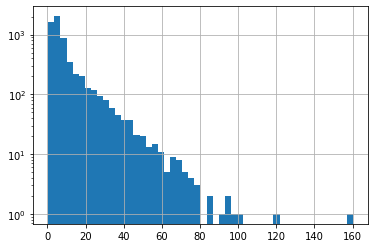

In [27]:
df["Price"].hist(bins = 50, log = True)

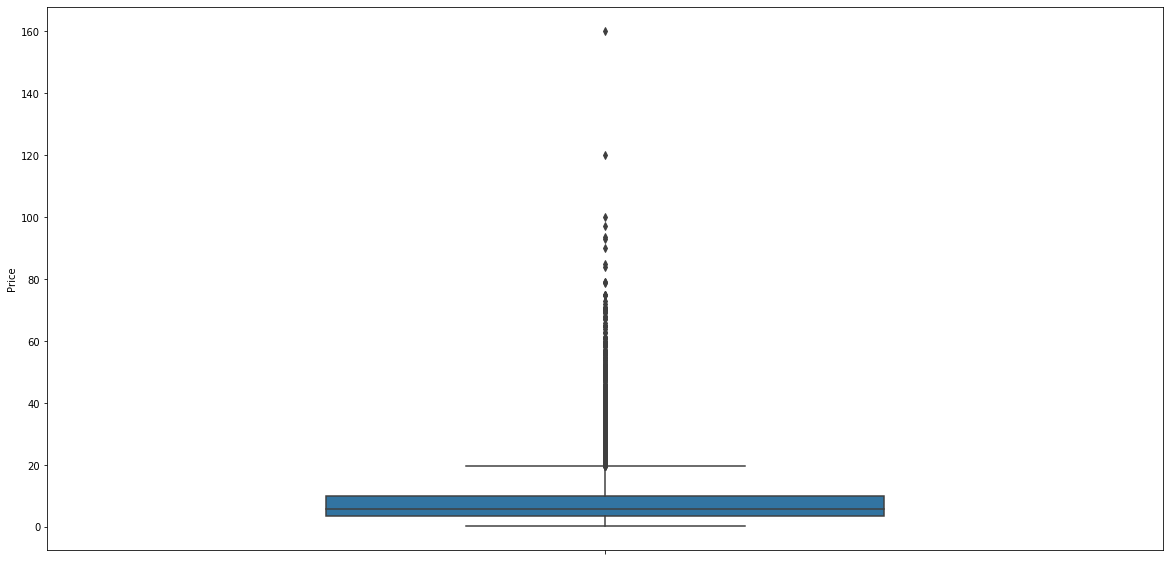

In [278]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price', data=df, width=0.5)

In [279]:
conda install wordcloud

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - wordcloud

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Vehicle Age vs Price')

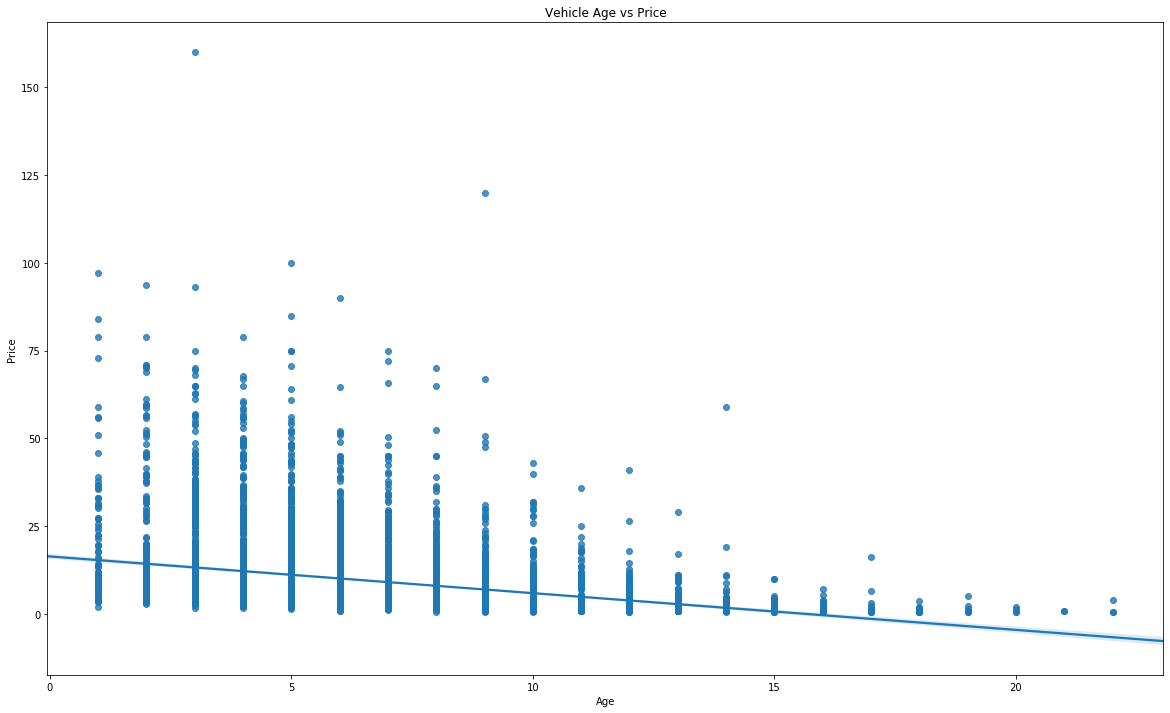

In [282]:
plt.figure(figsize=(20,12))
sns.regplot(x='Age', y='Price', data=df).set_title('Vehicle Age vs Price')

#### Less age more price (3-5 years looks good)

Text(0.5, 1.0, 'Vehicle Odometer vs Price')

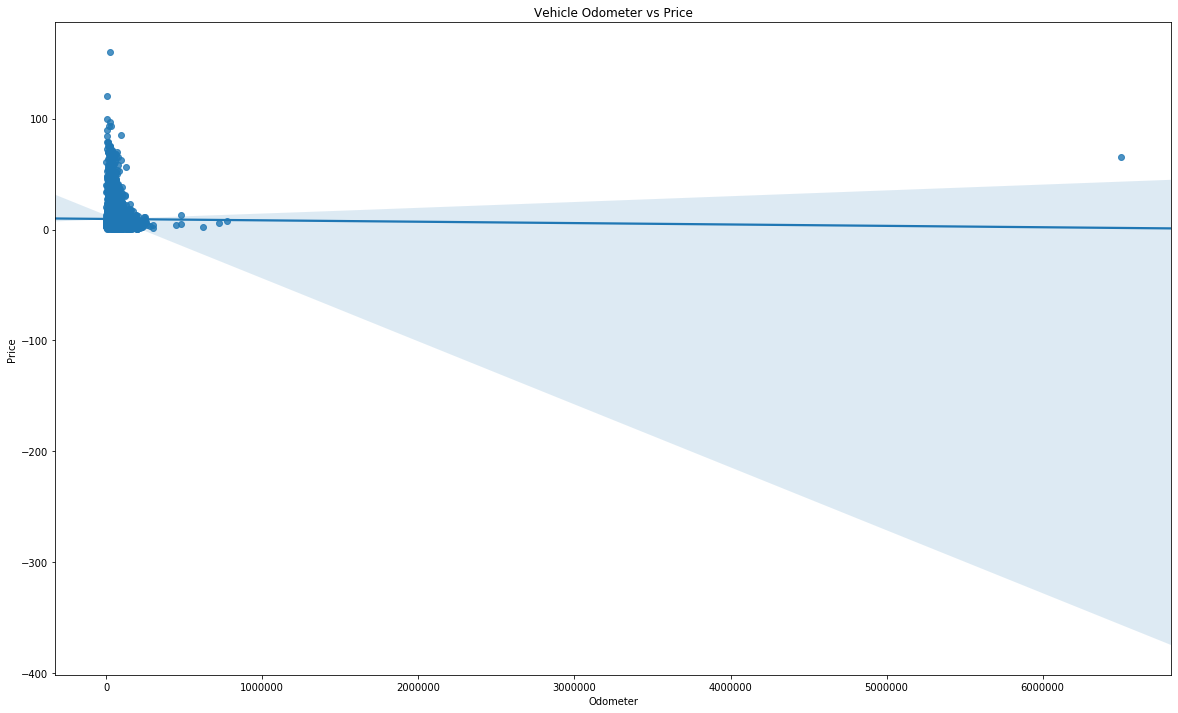

In [281]:
plt.figure(figsize=(20,12))
sns.regplot(x='Odometer', y='Price', data=df).set_title('Vehicle Odometer vs Price')

Text(0.5, 1.0, 'Odometer vs Price')

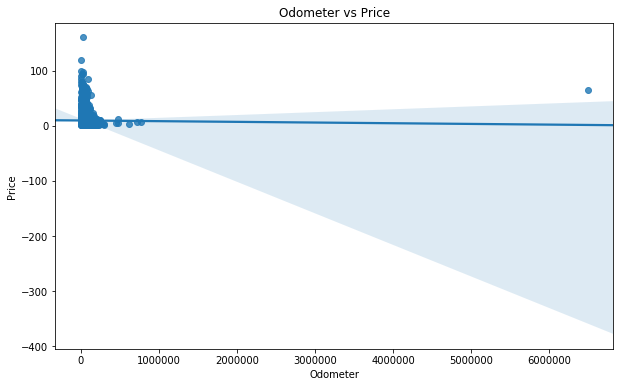

In [285]:
plt.figure(figsize=(10,6))
sns.regplot(x='Odometer', y='Price', data=df).set_title('Odometer vs Price')

### Less Odometer range more the price

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 6018
Data columns (total 11 columns):
Price           6000 non-null float64
Make            6000 non-null object
Location        6000 non-null object
Age             6000 non-null int64
Odometer        6000 non-null int64
FuelType        6000 non-null object
Transmission    6000 non-null object
OwnerType       6000 non-null object
Mileage         6000 non-null object
EngineCC        6000 non-null object
PowerBhp        6000 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 562.5+ KB


In [289]:
df.Mileage = df.Mileage.astype(float)
df.EngineCC = df.EngineCC.astype(float)
df.PowerBhp = df.PowerBhp.astype(float)

In [ ]:
### Correlation

In [290]:
df.corr()

,Price,Age,Odometer,Mileage,EngineCC,PowerBhp
Price,1.000000,-0.304574,-0.010222,-0.334073,0.659179,0.772927
Age,-0.304574,1.000000,0.173081,-0.295958,0.051674,-0.029659
Odometer,-0.010222,0.173081,1.000000,-0.065780,0.091871,0.031678
Mileage,-0.334073,-0.295958,-0.065780,1.000000,-0.642719,-0.545844
EngineCC,0.659179,0.051674,0.091871,-0.642719,1.000000,0.866661
PowerBhp,0.772927,-0.029659,0.031678,-0.545844,0.866661,1.000000


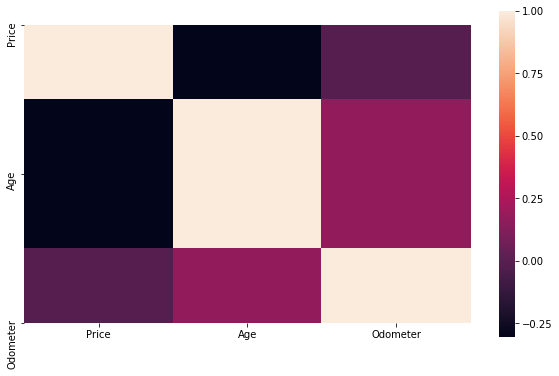

In [292]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

### Train & Test Split Creation

In [333]:
df.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp,Brand
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,mar
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,hyu
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,hon
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,mar
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,aud


In [334]:
df.drop('Make',axis=1,inplace=True)

In [335]:
df.head()

,Price,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp,Brand
0,1.75,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,mar
1,12.50,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,hyu
2,4.50,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,hon
3,6.00,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,mar
4,17.74,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,aud


In [355]:
# Seperation of Predcitors (Features) and the Labes (Targets)

y = df["Price"].copy()
df.drop("Price", axis=1,inplace=True)

### Got this on internet/stack-overflow

In [356]:
# Since Scikit-Learn doesn't hanldes DataFrame, we build a class for it

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [357]:
# Setting categorical and numerical attributes

categorical_features = ['Brand','Location','FuelType','Transmission','OwnerType']

numerical_features = list(df.drop(categorical_features, axis=1))

# Building the Pipelines

numerical_pipeline = Pipeline([
    ("selector", DFSelector(numerical_features)),
    ("std_scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("selector", DFSelector(categorical_features)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline)
])

In [358]:
numerical_features

['Age', 'Odometer', 'Mileage', 'EngineCC', 'PowerBhp']

### New features/columns added because of OneHotEncoder

In [359]:
df.shape

(6000, 10)

#### 5 Categorical encoded using OneHotEncoder

#### 5 Numerical

In [360]:
len(df['Brand'].unique()) + len(df['Location'].unique()) + len(df['FuelType'].unique()) + len(df['Transmission'].unique()) + len(df['OwnerType'].unique())

48

In [361]:
48 + 5

53

In [362]:
len(df['Location'].unique())

11

In [363]:
X = full_pipeline.fit_transform(df)

In [365]:
X.shape

(6000, 53)

In [366]:
y.shape

(6000,)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [370]:
X_train.shape

(4500, 53)

In [372]:
y_train.shape

(4500,)

In [371]:
X_test.shape

(1500, 53)

In [373]:
y_test.shape

(1500,)

## Models

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Regression Model

In [375]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
linreg.score(X_train, y_train)

0.7698809320258448

In [377]:
linreg.score(X_test, y_test)

0.760623641630085

In [378]:
y_pred = linreg.predict(X_test)

In [381]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.600700933422275

#### Residual plots 


Used to check the error between actual values and predicted values. If a linear model is appropriate, we expect to see the errors to be randomly spread and have a zero mean.

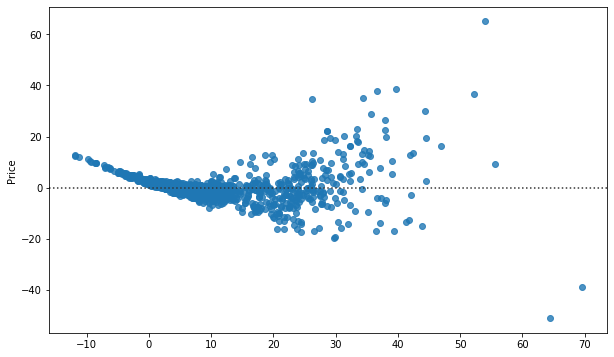

In [379]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

The mean of the points might be close to zero but obviously they are not randomly spread. The spread is close to a U-shape which indicates a linear model might not be the best option for this task.

### DecisionTreeRegressor

In [384]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [385]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.849837741272038

In [420]:
tree_reg.score(X_test, y_test)

0.8205055982619491

#### R2 of DecisionTreeRegressor better than Linear Regression 

### RandomForestRegressor

In [421]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(X_train, y_train)

/Users/krishna.tiwari/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [387]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.6618054376005156

In [427]:
forest_reg.score(X_test,y_test)

0.8976737589429812

### GradientBoostingRegressor

In [402]:
gbrt=GradientBoostingRegressor(n_estimators=100)

In [403]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [404]:
y_pred=gbrt.predict(X_test)

In [424]:
gbrt.score(X_test,y_test)

0.9027935347504928

In [425]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.491727876721665

### KNeighborsRegressor

In [408]:
from sklearn.neighbors import KNeighborsRegressor

In [410]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [411]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [412]:
y_pred=neigh.predict(X_test)

In [445]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.397893638120978

#### R2 of RandomForestRegressor better than DecisionTreeRegressor and also RMSE is also less 

In [388]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [389]:
# Offline i used CV=10

scores = cross_val_score(lin_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [5.87988548 5.21022189 6.06128216 5.98904206]
Mean: 5.785107898523631
Standard deviation: 0.3381338758542674


In [390]:
# Offline i used CV=10

scores = cross_val_score(tree_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [4.24612667 4.63004403 5.90278843 7.18282292]
Mean: 5.490445512290135
Standard deviation: 1.1535584120045503


In [391]:
# Offline i used CV=8

from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=2)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [4.05033532 5.15402201]
Mean: 4.602178664941297
Standard deviation: 0.5518433472998878


In [429]:
# Offline i used CV=8

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbrt, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=2)
rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores: [3.72546114 4.73600699]
Mean: 4.230734068189738
Standard deviation: 0.5052729267103451


In [430]:
# Offline i used CV=8

from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=2)
rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores: [4.65646062 6.08647516]
Mean: 5.37146788983609
Standard deviation: 0.7150072708362579


In [434]:
conda install -c conda-forge xgboost


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/krishna.tiwari/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    libxgboost-0.90            |       h6de7cb9_1         2.4 MB  conda-forge
    py-xgboost-0.90            |   py37h6de7cb9_1          71 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    xgboost-0.90               |   py37h6de7cb

## XGBRegressor

In [435]:
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

In [438]:
xgb_reg = XGBRegressor(n_estimators=100,
                           eta=0.05,
                           learning_rate=0.02,
                           gamma=2,
                           max_depth=6,
                           min_child_weight=1,
                           colsample_bytree=0.8,
                           subsample=0.3,
                           reg_alpha=2,
                           base_score=9.99)

In [439]:
xgb_reg.fit(X_train,y_train)

/Users/krishna.tiwari/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=9.99, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.05, gamma=2,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.3, verbosity=1)

In [440]:
y_pred = xgb_reg.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(forest_mse)
xgb_rmse

3.6618054376005156

In [442]:
xgb_reg.score(X_test,y_test)

0.8524001439676515

In [444]:
# Offline i used CV=8

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=2)
rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

/Users/krishna.tiwari/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/krishna.tiwari/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:10:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [4.34435791 5.77409917]
Mean: 5.059228542818616
Standard deviation: 0.7148706290466582


## RMSE comparision 
* LR-RMSE 5.600700933422275
* DT-RMSE 4.849837741272038
* RF-RMSE 3.6618054376005156
* GradientBoostingRegressor-RMSE 4.491727876721665
* KNeighborsRegressor-RMSE 4.397893638120978
* XGBRegressor-RMSE 3.6618054376005156

### RandomForest Looks winner here! RF and XGBRegressor are very close!

## Feature Importance

In [448]:
feature_importances = forest_reg.feature_importances_
feature_importances

array([1.78156611e-01, 2.86829425e-02, 1.69018117e-02, 2.68037566e-02,
       6.57141087e-01, 0.00000000e+00, 2.66752399e-03, 0.00000000e+00,
       1.85221071e-03, 2.84985160e-04, 1.05342325e-06, 8.33068931e-06,
       7.31647562e-04, 1.40400038e-03, 7.50943511e-04, 8.05128724e-06,
       9.46830240e-04, 1.53240925e-04, 0.00000000e+00, 1.83135747e-02,
       1.06030591e-03, 2.20595585e-04, 9.38543216e-03, 4.59668094e-03,
       1.28221801e-04, 1.22114914e-05, 5.05077936e-03, 1.66507084e-04,
       8.35686479e-04, 3.08817211e-04, 6.67477446e-04, 7.68824623e-04,
       1.33392514e-03, 1.28414249e-03, 6.25214198e-04, 2.23501983e-03,
       1.56111672e-03, 1.76118029e-02, 3.48211919e-04, 3.26674310e-03,
       9.20547186e-04, 1.24341009e-03, 6.72547925e-04, 4.02461286e-06,
       2.04909040e-03, 7.14678445e-07, 1.81703733e-03, 2.27778851e-03,
       3.23520748e-03, 6.53975725e-04, 3.28014826e-07, 7.71481043e-04,
       7.75288204e-05])

In [449]:
cat_encoder = categorical_pipeline.named_steps["encoder"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = categorical_features #+ cat_encoder
sorted(zip(feature_importances, attributes), reverse=True)

[(0.6571410871567587, 'OwnerType'),
 (0.1781566112518294, 'Brand'),
 (0.02868294253921978, 'Location'),
 (0.02680375657305637, 'Transmission'),
 (0.016901811691808502, 'FuelType')]

## Final Prediction and conclusion

In [450]:
final_model = forest_reg

from sklearn.metrics import mean_squared_error
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

In [396]:
final_rmse

3.6618054376005156

## TODO - Make it modular an call using main

In [ ]:
def main(argv):
    ## Make it modular 
    
if __name__ == "__main__":
   main(sys.argv[1:])


## TODO

* DNN for improving prediction & avoiding overfitting
* Tune Decision-Tree parameters/XGBoost (like the number of trees, depth, etc)